## Project Beer reviews 
### Group SustainablePandas
Groups members: Bastien Amez-Droz, Noé Fellay, Nicolas Frédéric Rochat, Baptiste Michel \
TA: Halima Schede

### Libraries

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

import tarfile
import gzip
import shutil

import seaborn as sns
import math
import matplotlib
import pandas as pd
import os
import numpy as np
import pandas as pd
import folium
import geopandas as gpd

### Uncompress folders and files

In [18]:
def ungzip_folder(FOLDER_NAME):
    """
    This function allows to extract datas from gzip folder into a new accessible folder
    - FOLDER_NAME: name of the folder to create from the gzip folder
    The function returns nothing, it only creates the new folder
    """
    FOLDER_PATH = './Data/' + FOLDER_NAME
    
    #check if folder is already unzipped
    if os.path.exists(FOLDER_PATH) == False:
    
        # open folder
        folder = tarfile.open(FOLDER_PATH + '.tar.gz',"r:gz")
        # extracting folder
        folder.extractall(FOLDER_PATH)
        # closing folder
        folder.close()

In [19]:
ungzip_folder("RateBeer")

In [20]:
def ungzip_txt_file(FOLDER_NAME, FILE_NAME):
    """
    This function allows to extract datas from gzip file into a new accessible file
    - FOLDER_NAME: name of the folder in which the gzip file is
    - FILE_NAME: name of the file to create from the gzip file
    The function returns nothing, it only creates the new file
    """
    FILE_PATH = './Data/' + FOLDER_NAME + '/' + FILE_NAME
    
    #check if file is already unzipped
    if os.path.exists(FILE_PATH) == False:
    
        with gzip.open(FILE_PATH + '.gz', 'r') as f_in:
            with open(FILE_PATH, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

In [21]:
ungzip_txt_file("RateBeer","ratings.txt")
ungzip_txt_file("RateBeer","reviews.txt")

### Extract infos from txt files

In [22]:
def txt_to_dataframe(FOLDER_NAME,FILE_NAME,keys_list):
    """
    This function allows to pass the txt file to a dataframe and save it as a csv file 
    - FOLDER_NAME: name of the folder in which the txt file is
    - FILE_NAME: text file with a dictionary format
    - keys_list: list of keys for the columns
    The function returns a dataframe file and save it as a csv file
    """
    dict_list = []
    newDict = {key: None for key in keys_list}
    
    FOLDER_PATH = './Data/' + FOLDER_NAME
    FILE_PATH = FOLDER_PATH + '/' + FILE_NAME + ".txt"
    CSV_FILE_PATH = FOLDER_PATH + '/' + FILE_NAME + ".csv"
    
    if os.path.exists(CSV_FILE_PATH) == False:
        with open(FILE_PATH, 'r', encoding="utf8") as f:
    
            for line in f:
                line = line.replace(u'\xa0','')
                listedline = line.split(':',1) # split around the ":" sign
        
                # take non-empty lines
                if len(listedline) > 1:
                    newDict[listedline[0]] = listedline[1].strip()
        
                # finish the dictionary for the line
                if listedline[0] == keys_list[-1]:
                    dict_list.append(newDict)
            
                    # reinitialize the dictionary for the next line
                    newDict = {key: None for key in keys_list}
    
            # transform list of dictionaries to dataframe
            df = pd.DataFrame(dict_list,columns=keys_list)
            
            # save dataframe file to a pickle file
            df.to_csv(CSV_FILE_PATH)
    
        return df
    
    else:
        
        df_csv = pd.read_csv(CSV_FILE_PATH,index_col = [0])
    
        return df_csv

In [23]:
keys_reviews = (['beer_name','beer_id','brewery_name','brewery_id','style','abv','date','user_name','user_id',\
                          'appearance','aroma','palate','taste','overall','rating','text'])

df_reviews_RB = txt_to_dataframe("RateBeer","reviews",keys_reviews)

# set time variable
df_reviews_RB['date'] = pd.to_datetime(df_reviews_RB['date'], unit='s')

In [24]:
df_reviews_RB.head(1)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26 10:00:00,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."


In [25]:
print(df_reviews_RB.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7122074 entries, 0 to 7122073
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   beer_name     object        
 1   beer_id       int64         
 2   brewery_name  object        
 3   brewery_id    int64         
 4   style         object        
 5   abv           float64       
 6   date          datetime64[ns]
 7   user_name     object        
 8   user_id       int64         
 9   appearance    int64         
 10  aroma         int64         
 11  palate        int64         
 12  taste         int64         
 13  overall       int64         
 14  rating        float64       
 15  text          object        
dtypes: datetime64[ns](1), float64(2), int64(8), object(5)
memory usage: 923.7+ MB
None


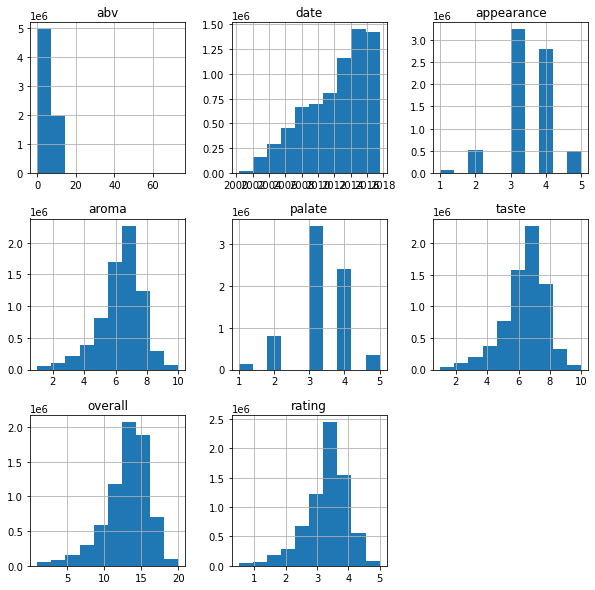

In [72]:
df_reviews_RB.hist(column=['abv','date','appearance','aroma','palate','taste','overall','rating'],figsize = (10,10))

plt.xticks(rotation=50)
plt.show()

### Extract infos from csv files

In [27]:
# Extract beer informations
df_beers_RB = pd.read_csv("./Data/RateBeer/beers.csv")
print(df_beers_RB.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442081 entries, 0 to 442080
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   beer_id                    442081 non-null  int64  
 1   beer_name                  442081 non-null  object 
 2   brewery_id                 442081 non-null  int64  
 3   brewery_name               442081 non-null  object 
 4   style                      442081 non-null  object 
 5   nbr_ratings                442081 non-null  int64  
 6   overall_score              104028 non-null  float64
 7   style_score                104068 non-null  float64
 8   avg                        395657 non-null  float64
 9   abv                        399987 non-null  float64
 10  avg_computed               396690 non-null  float64
 11  zscore                     42228 non-null   float64
 12  nbr_matched_valid_ratings  442081 non-null  int64  
 13  avg_matched_valid_ratings  42

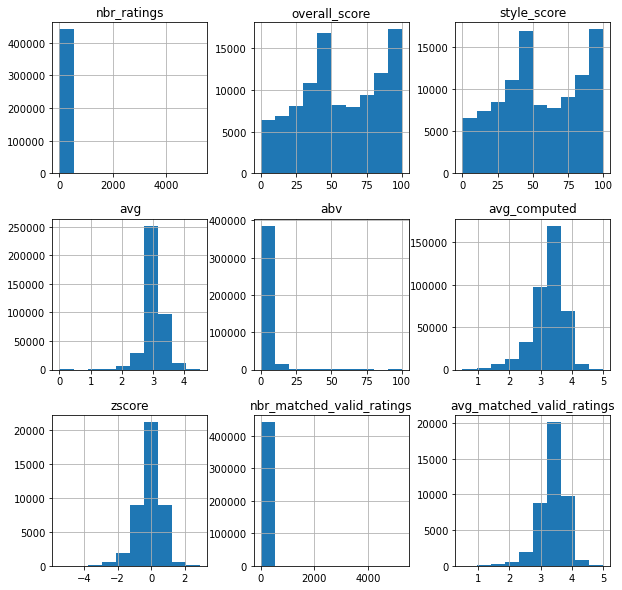

In [29]:
df_beers_RB.hist(column=["nbr_ratings","overall_score","style_score","avg","abv","avg_computed","zscore","nbr_matched_valid_ratings","avg_matched_valid_ratings"],figsize = (10,10))
plt.show()

In [29]:
# Extract brewery informations
df_breweries_RB = pd.read_csv("./Data/RateBeer/breweries.csv")
df_breweries_RB.rename(columns={"id": "brewery_id"}, inplace=True)
print(df_breweries_RB.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24189 entries, 0 to 24188
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brewery_id  24189 non-null  int64 
 1   location    24189 non-null  object
 2   name        24189 non-null  object
 3   nbr_beers   24189 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 756.0+ KB
None


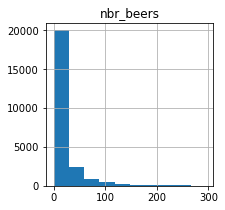

In [36]:
df_breweries_RB.hist(column=["nbr_beers"],figsize = (3,3))
plt.show()

In [37]:
# Extract users informations
df_users_RB = pd.read_csv("./Data/RateBeer/users.csv")
# as user_id duplicates were observed, we dropped them
df_users_RB = df_users_RB.drop_duplicates(subset=['user_id'],keep = 'first')
# set time variable
df_users_RB['joined'] = pd.to_datetime(df_users_RB['joined'], unit='s')
print(df_users_RB.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70120 entries, 0 to 70173
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   nbr_ratings  70120 non-null  int64         
 1   user_id      70120 non-null  int64         
 2   user_name    70120 non-null  object        
 3   joined       70090 non-null  datetime64[ns]
 4   location     50543 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.2+ MB
None


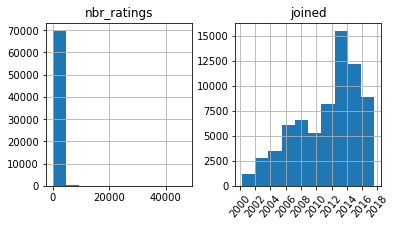

In [65]:
#plt.hist(df_users_RB["nbr_ratings",'joined'],figsize = (6,3))
df_users_RB.hist(column=["nbr_ratings",'joined'],figsize = (6,3),orientation="vertical")
plt.xticks(rotation=50)

plt.show()

### Create a dataframe for further analyses

Dataframe format: &emsp; beer_name | beer_id | brewery_id | date | user_name | user_id | rating | user_location | brewery_location

In [32]:
df_reviews_RB['user_id'] = df_reviews_RB['user_id'].astype(int)
df_reviews_RB['brewery_id'] = df_reviews_RB['brewery_id'].astype(int)
df_reviews_RB['rating'] = df_reviews_RB['rating'].astype(float)

# merge reviews and users on user id
df_reviews_users_RB=pd.merge(df_reviews_RB, df_users_RB, how="left", on=['user_id'])
# merge reviews and users on brewery id
df_all_RB = pd.merge(df_reviews_users_RB,df_breweries_RB, how='left', on=['brewery_id'])

# rename some variables
df_all_RB.rename(columns={"location_x": "user_location"}, inplace=True)
df_all_RB.rename(columns={"location_y": "brewery_location"}, inplace=True)
df_all_RB.rename(columns={"user_name_x": "user_name"}, inplace=True)

# remove doubles
df_all_RB = df_all_RB.drop(["name"], axis=1)

# drop duplicates (users giving reviews more than once on a beer)
df_all_RB = df_all_RB.drop_duplicates(subset=['beer_id','user_name','user_id'],keep = 'first')

df_all_RB.head(1)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,taste,overall,rating,text,nbr_ratings,user_name_y,joined,user_location,brewery_location,nbr_beers
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26 10:00:00,Manslow,175852,2,...,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło...",1890.0,Manslow,2012-05-20 10:00:00,Poland,Gabon,3


In [33]:
# keep only keys of interest
keys_to_drop = ['brewery_name', 'abv', 'appearance','aroma', 'palate', 'taste', 'overall', 'text', 'nbr_ratings', 'joined', 'nbr_beers']
df_interest_RB= df_all_RB.drop(keys_to_drop, axis=1)
df_interest_RB.head(1)

,beer_name,beer_id,brewery_id,style,date,user_name,user_id,rating,user_name_y,user_location,brewery_location
0,33 Export (Gabon),410549,3198,Pale Lager,2016-04-26 10:00:00,Manslow,175852,2.0,Manslow,Poland,Gabon


In [42]:
print(df_interest_RB.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7121987 entries, 0 to 7122073
Data columns (total 11 columns):
 #   Column            Dtype         
---  ------            -----         
 0   beer_name         object        
 1   beer_id           int64         
 2   brewery_id        int32         
 3   style             object        
 4   date              datetime64[ns]
 5   user_name         object        
 6   user_id           int32         
 7   rating            float64       
 8   user_name_y       object        
 9   user_location     object        
 10  brewery_location  object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(6)
memory usage: 597.7+ MB
None


In [23]:
## Counting unqiueness by Brewery
print('Number of unique brewery by ids:',df_interest_RB.brewery_id.nunique())

## Counting uniqueness by Beer
print('Number of unique beer by ids:',df_interest_RB.beer_id.nunique())

## Counting number of users
print('Number of unique user by names and id:',pd.concat([df_interest_RB['user_name'],df_interest_RB['user_id']]).nunique())

Number of unique brewery by ids: 21832
Number of unique beer by ids: 396690
Number of unique users: 140288


### Reviews per US State and country

In [45]:
# split user location into country and county
df_interest_RB[["user_country","user_state"]] = df_interest_RB['user_location'].str.split(pat = ', ', expand = True)
df_interest_RB.fillna("",inplace=True)

# create a dataframe on counties from United States
Num_state = df_interest_RB.groupby(["user_country","user_state"])["user_state"].count()
Num_state = Num_state["United States"]
df_state = Num_state.to_frame()
df_state.rename(columns = {'user_state':'reviews'}, inplace = True)

# create a dataframe on countries
Num_country = df_interest_RB.groupby(["user_country"])["user_country"].count()
df_country = Num_country.to_frame()
df_country.rename(columns = {'user_country':'reviews'}, inplace = True)

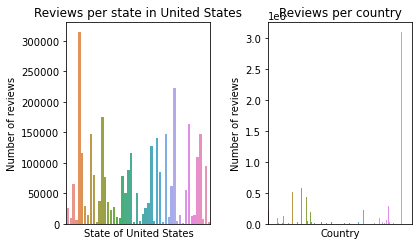

In [47]:
# Plot of reviews per state in US
plt.subplot(121)
sns.barplot(x = df_state.index, y="reviews",data=df_state)

plt.title("Reviews per state in United States")
plt.xlabel("State of United States")
plt.tick_params(
    axis='x',
    bottom=False,
    labelbottom=False)
plt.ylabel("Number of reviews")

# Plot of reviews per country
plt.subplot(122)
sns.barplot(x = df_country.index, y="reviews",data=df_country)

plt.title("Reviews per country")
plt.xlabel("Country")
plt.tick_params(
    axis='x',
    bottom=False,
    labelbottom=False)
plt.ylabel("Number of reviews")

plt.subplots_adjust(left=0.1,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

### Breweries per location

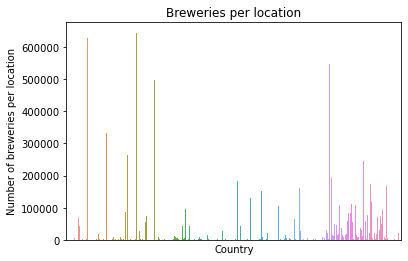

In [42]:
Num_brewery = df_interest_RB.groupby('brewery_location')['brewery_location'].count()
df_brewery = Num_brewery.to_frame()
df_brewery.rename(columns = {'brewery_location':'breweries'}, inplace = True)

# Plot of breweries per location
sns.barplot(x = Num_brewery.index, y="breweries",data=df_brewery)

plt.title("Breweries per location")
plt.xlabel("Country")
plt.tick_params(
    axis='x',
    bottom=False,
    labelbottom=False)
plt.ylabel("Number of breweries per location")
plt.show()

### Regroup styles in global categories

In [74]:
categories = (['Lager & Pilsner', 'Dark Lager', 'Bock', 'Brown Ale', \
               'Pale Ale', 'IPA', 'Porter', 'Stout', 'Belgian', 'Wheat', \
               'Sour', 'Strong', 'Scottish', 'Low alcohol', 'Cider', 'Saké', \
               'Mead', 'Radler', 'Aromatised', 'Rauchbier', 'Fruit', 'Hybrid', 'Other'])
cat_names = (['lager','dark_lager','bock','brown','pale','ipa','porter','stout','belgian','wheat','sour','strong','scottish','low','cider','sake',\
              'mead','radler','aromatised','smoked','fruit','hybrid','other'])

# Pale lager and Pilsner
lager = (['Pale Lager', 'Zwickel/Keller/Landbier', 'Saison', 'Pilsener',  'Premium Lager', 'Dortmunder/Helles', 'Czech Pilsner (Světlý)', 'Imperial Pils/Strong Pale Lager'])
#Dark lager
dark_lager = (['Dunkel/Tmavý', 'Amber Lager/Vienna', 'Oktoberfest/Märzen', 'Schwarzbier', 'Polotmavý'])
#German Bocks
bock = (['Heller Bock', 'Doppelbock', 'Dunkler Bock', 'Weizen Bock', 'Eisbock'])
#Brown Ales
brown = (['Mild Ale', 'Brown Ale', 'Traditional Ale'])
# Pale Ales
pale = (['Golden Ale/Blond Ale', 'Bitter', 'American Pale Ale', 'Irish Ale',   'Amber Ale', 'Premium Bitter/ESB', 'English Pale Ale', 'Kölsch', 'Altbier'])
#IPA
ipa = (['Black IPA', 'India Pale Ale (IPA)', 'American Strong Ale', 'Session IPA', 'Imperial IPA'])
#Porter
porter = (['Porter',  'Baltic Porter', 'Imperial Porter'])
#Stout
stout = (['Stout', 'Imperial Stout', 'Foreign Stout', 'Dry Stout', 'Sweet Stout'])
#Belgian style
belgian = (['Belgian Ale', 'Abbey Tripel', 'Belgian Strong Ale', 'Bière de Garde', 'Abbey Dubbel', 'Abt/Quadrupel'])
#Wheat beer
wheat = (['Wheat Ale',  'Berliner Weisse', 'German Hefeweizen', 'Witbier', 'Dunkelweizen', 'German Kristallweizen'])
#Wild & Sour Ale
sour = (['Sour/Wild Ale', 'Sour Red/Brown', 'Lambic Style - Fruit', 'Grodziskie/Gose/Lichtenhainer', 'Lambic Style - Gueuze', 'Lambic Style - Unblended', 'Lambic Style - Faro'])
#Strong Ale - belgian strong ale duplicate
strong = (['English Strong Ale', 'American Strong Ale', 'Scotch Ale', 'Barley Wine', 'Old Ale'])
#Scottish ale
scottish = (['Scottish Ale'])
#Low alcohol
low = (['Low Alcohol'])
#Cider
cider = (['Cider', 'Perry'])
#Saké
sake = (['Saké - Daiginjo', 'Saké - Namasaké', 'Saké - Ginjo', 'Saké - Infused', 'Saké - Tokubetsu', 'Saké - Junmai', 'Saké - Nigori', 'Saké - Koshu', 'Saké - Taru', 'Saké - Honjozo', 'Saké - Genshu', 'Saké - Futsu-shu'])
#Mead
mead = (['Mead'])
#Radler
radler = (['Radler/Shandy'])
#Aromatised Spice, herb, vegetable
aromatised = (['Spice/Herb/Vegetable'])
#Rauchbier
smoked = (['Smoked'])
#Fruit beer
fruit = (['Fruit Beer'])
#Hybrid beer (lager yeast but high fermentation)
hybrid = (['India Style Lager', 'California Common', 'Cream Ale'])

#Other
other = (['Sahti/Gotlandsdricke/Koduõlu', 'Specialty Grain', 'Malt Liquor'])


conditions = [
    (df_interest_RB['style'].isin(lager)),
    (df_interest_RB['style'].isin( dark_lager)),
    (df_interest_RB['style'].isin(bock)),
    (df_interest_RB['style'].isin(brown)),
    (df_interest_RB['style'].isin(pale)),
    (df_interest_RB['style'].isin(ipa)),
    (df_interest_RB['style'].isin(porter)),
    (df_interest_RB['style'].isin(belgian)),
    (df_interest_RB['style'].isin(stout)),
    (df_interest_RB['style'].isin(wheat)),
    (df_interest_RB['style'].isin(sour)),
    (df_interest_RB['style'].isin(strong)),
    (df_interest_RB['style'].isin(scottish)),
    (df_interest_RB['style'].isin(low)),
    (df_interest_RB['style'].isin(cider)),
    (df_interest_RB['style'].isin(sake)),
    (df_interest_RB['style'].isin(mead)),
    (df_interest_RB['style'].isin(radler)),
    (df_interest_RB['style'].isin(aromatised)),
    (df_interest_RB['style'].isin(smoked)),
    (df_interest_RB['style'].isin(fruit)),
    (df_interest_RB['style'].isin(hybrid)),
    (df_interest_RB['style'].isin(other))
     ]
     
df_interest_RB['category'] = np.select(conditions, categories)





In [75]:
# Rearrange columns 
new_cols = ['beer_name',
 'beer_id',
 'brewery_id',
 'style',
 'category',
 'date',
 'rating',
 'user_location',
 'brewery_location'
 ]
df_interest_RB=df_interest_RB[new_cols]

In [76]:
#Test if a style of beer doesn't fit in a category
df_interest_RB[df_interest_RB['category']=='0'].head()

,beer_name,beer_id,brewery_id,style,category,date,rating,user_location,brewery_location


### Plot mean rating per category over all reviews

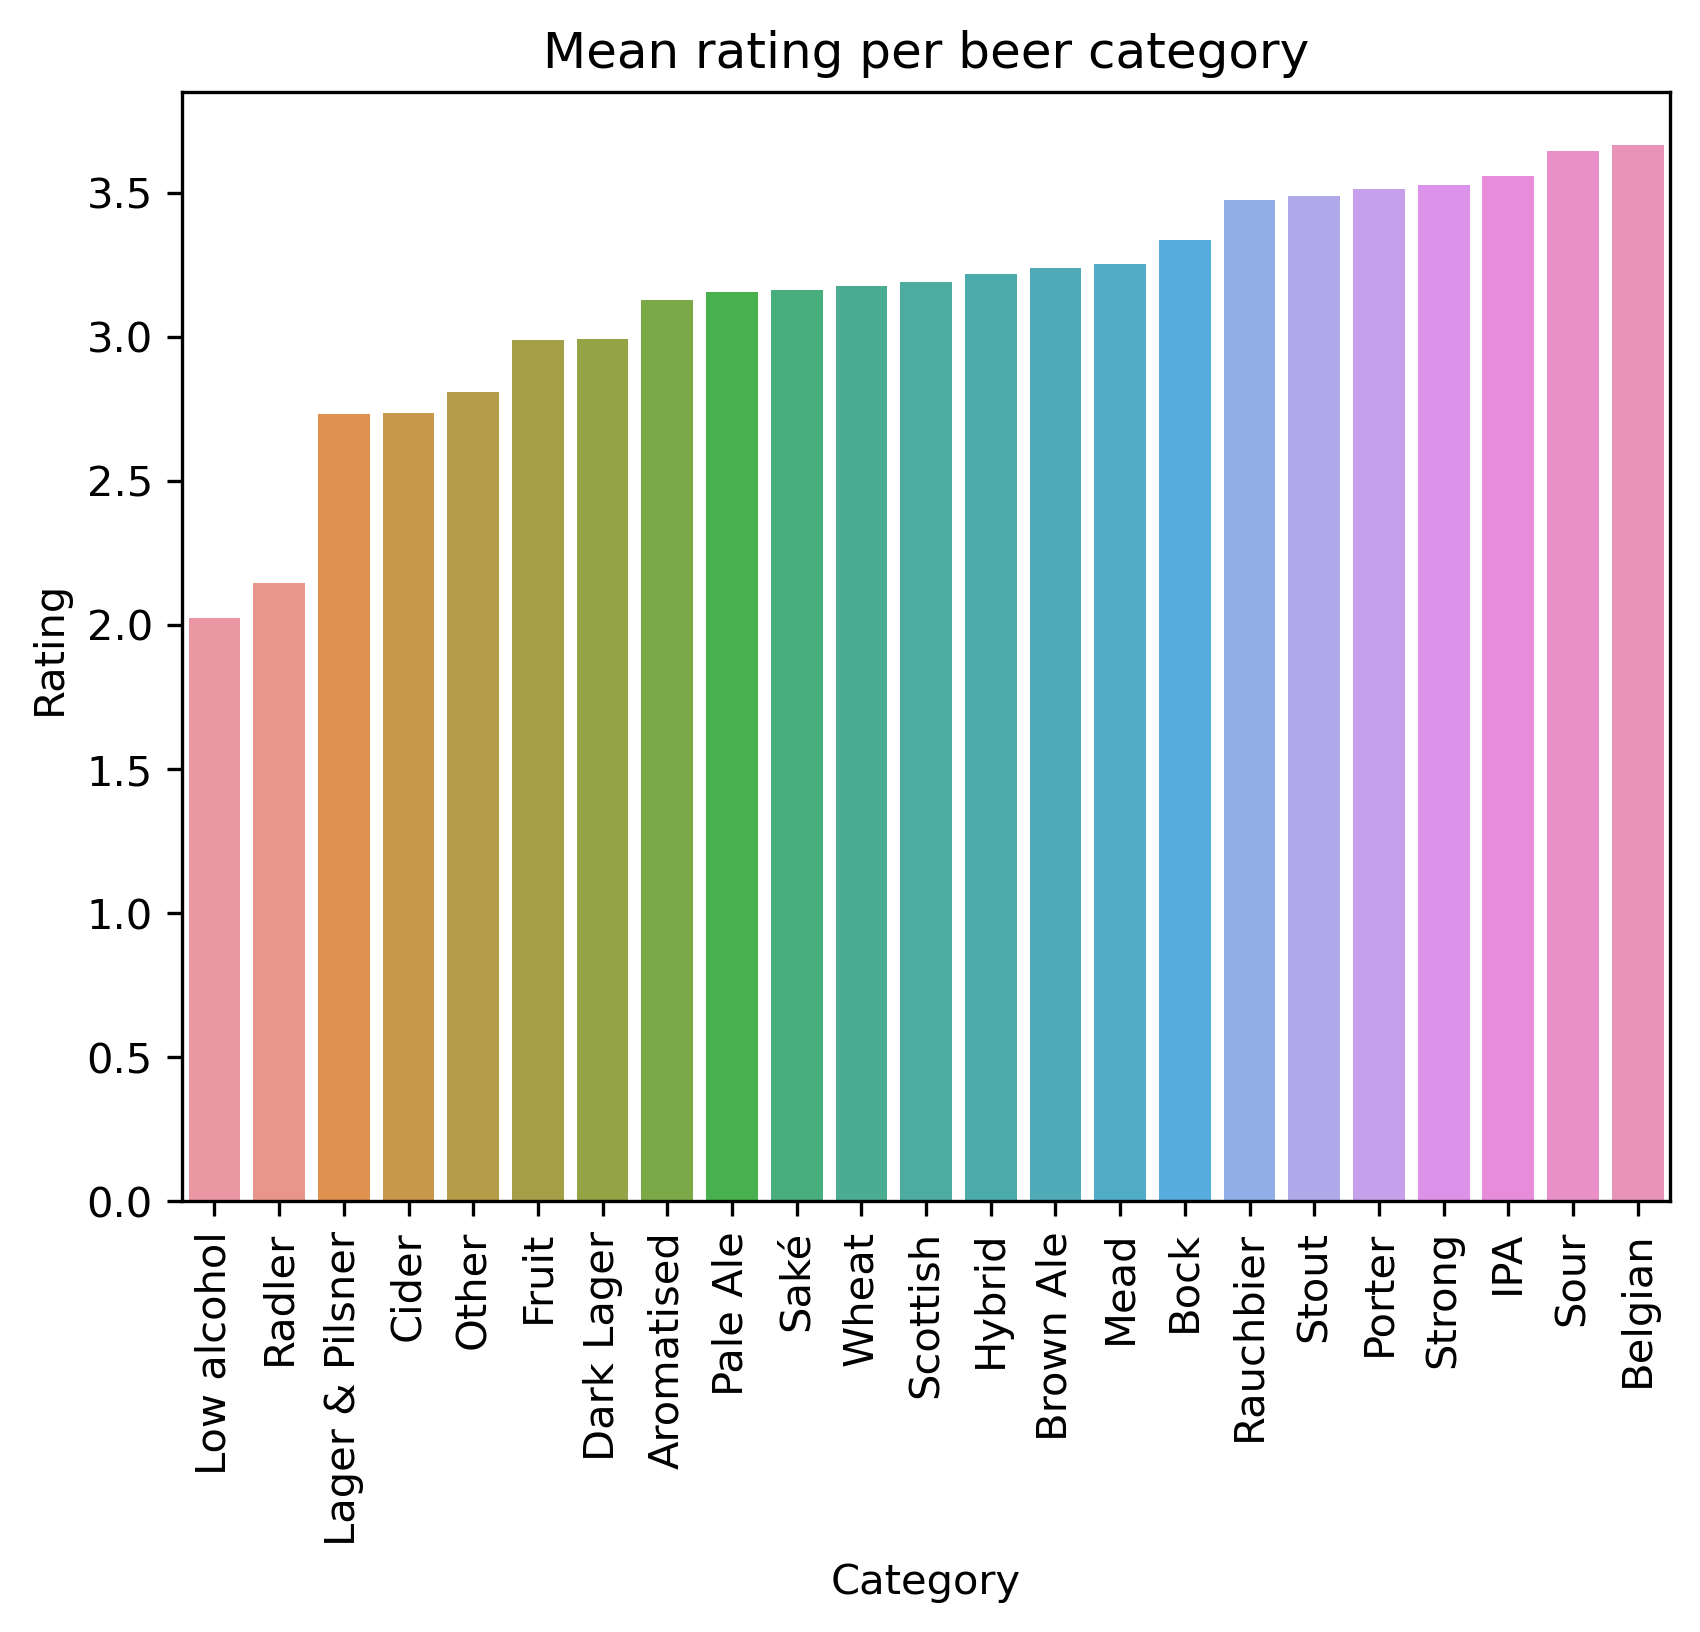

In [77]:
mean_category = df_interest_RB.groupby('category')['rating'].mean()
df_mean_category = mean_category.to_frame()
df_mean_category = df_mean_category.sort_values(by=['rating'])

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['figure.dpi'] = 300
#matplotlib.rcParams['figure.figsize'] = [5, 5]

ax = sns.barplot(x = df_mean_category.index,y='rating', data=df_mean_category)
plt.title("Mean rating per beer category")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.ylabel("Rating")
plt.show()

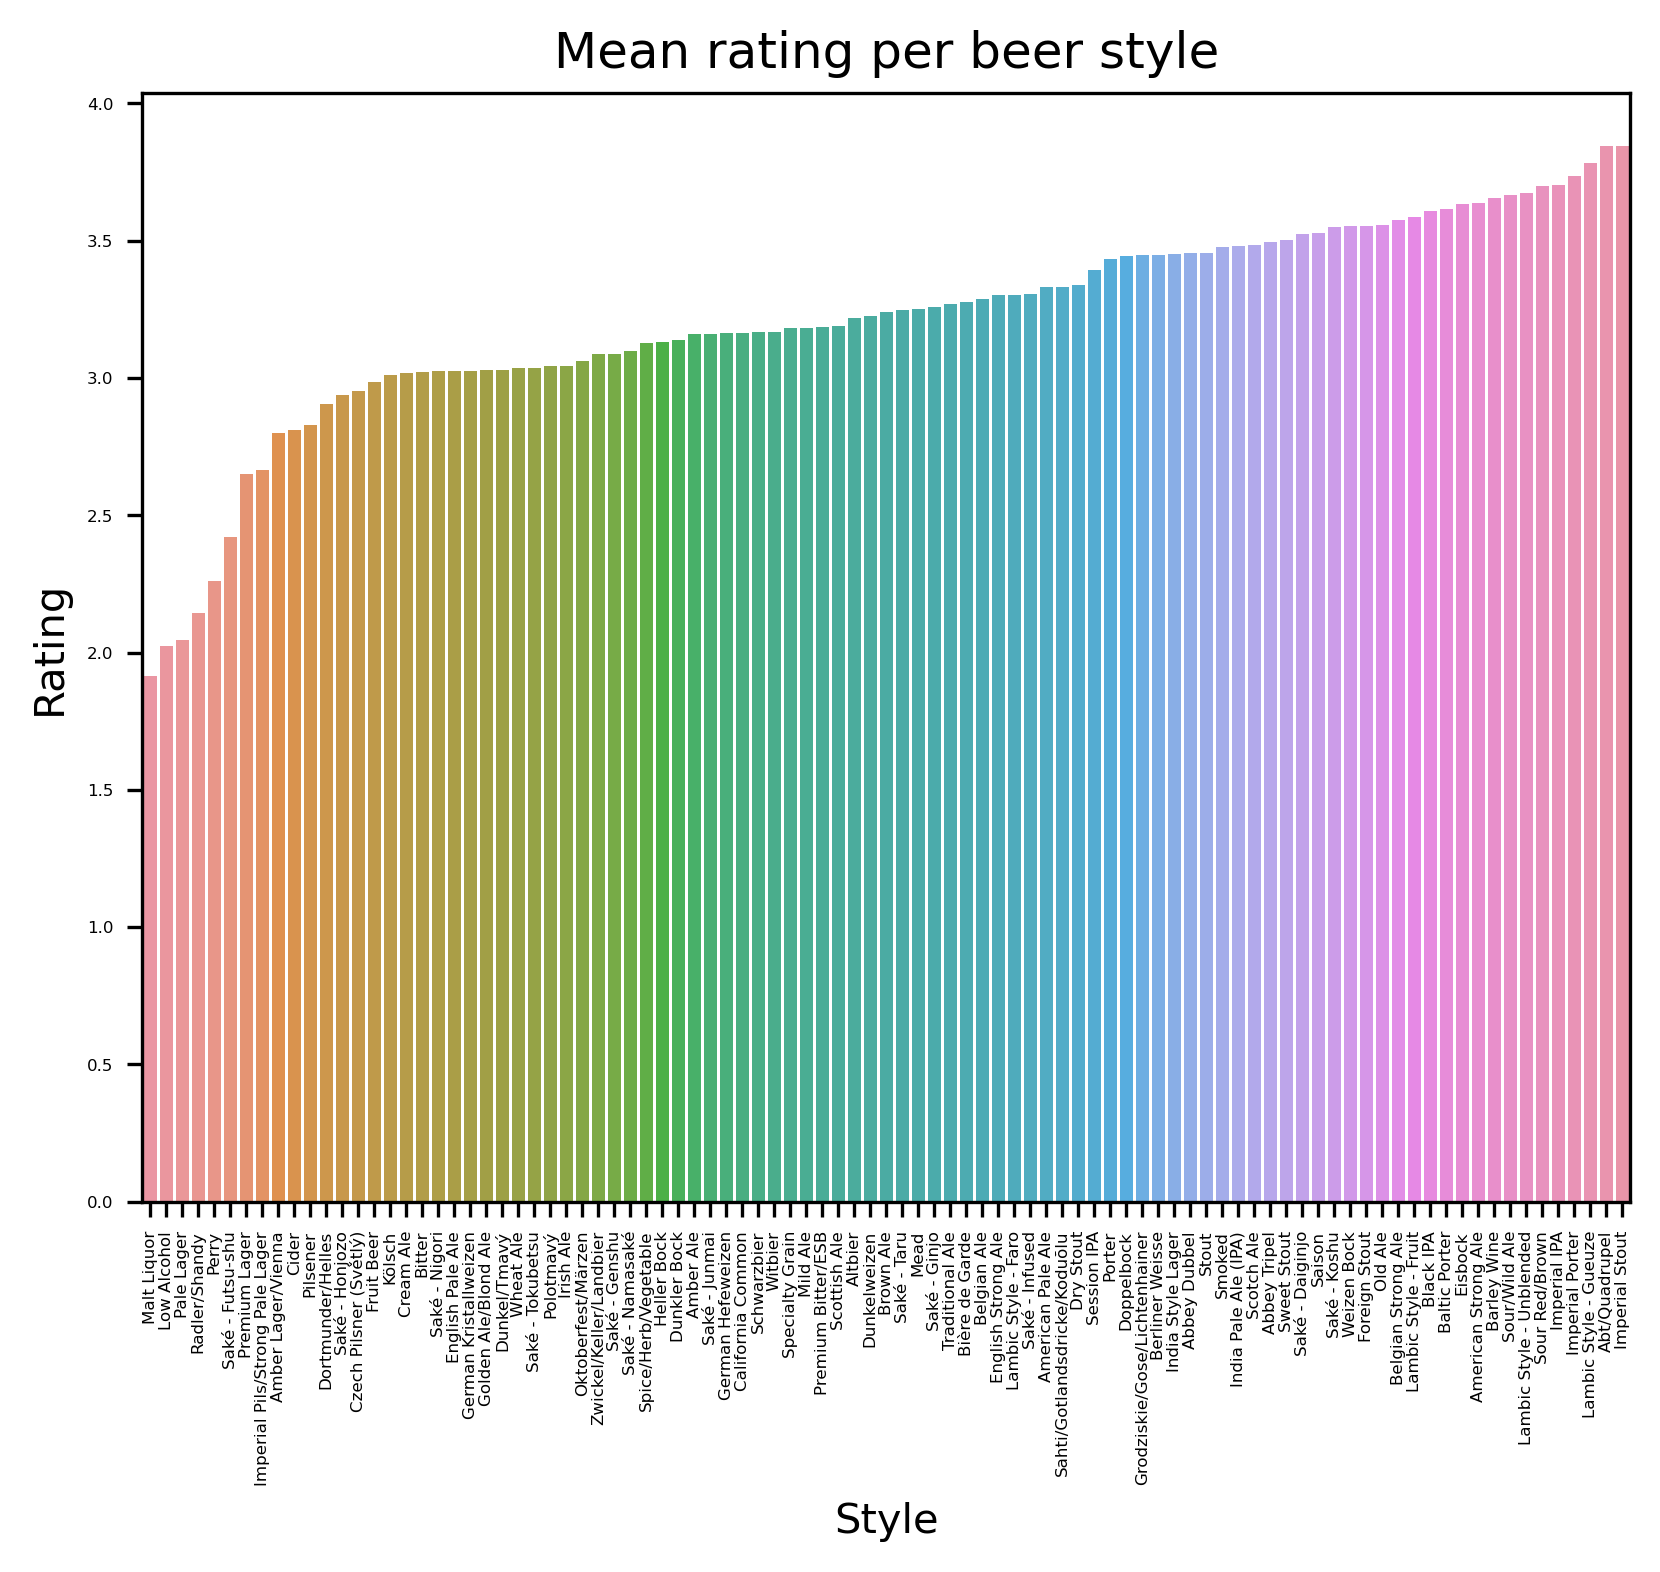

In [78]:
#[np.mean([df_interest_RB['rating'][df_interest_RB['category']==i]]) for i in categories]
mean_style = df_interest_RB.groupby('style')['rating'].mean()
df_mean_style = mean_style.to_frame()
df_mean_style = df_mean_style.sort_values(by=['rating'])

ax = sns.barplot(x = df_mean_style.index,y='rating', data=df_mean_style)
plt.title("Mean rating per beer style")
plt.xlabel("Style")
ax.tick_params(labelsize=4)
plt.xticks(rotation=90)
plt.ylabel("Rating")
plt.show()

## Style by Country

In [80]:
styles = df_interest_RB['style'].unique()
categories = df_interest_RB['category'].unique()
countries = df_interest_RB['user_location'].unique()
cols = np.insert(styles,0,'Country')
cols_categories = np.insert(categories,0,'Country')
df_countries = pd.DataFrame(df_interest_RB['user_location'].unique(),columns=(['Country']))
df_countries_category = pd.DataFrame(df_interest_RB['user_location'].unique(),columns=(['Country']))
df_countries=df_countries.reindex(columns=cols)

In [83]:
# RUN THIS FOR INTERACTIVE MAP [1]
import pandas as pd
df_countries_beer_only = pd.read_csv('./Data/rating_style_countrybeeronly.csv',index_col = [0],encoding='utf8',delimiter=';')

In [ ]:
#To generate the CSV file. Else, just load the premade file with the previous code cell
for country in countries:
    for style in styles:
        df_countries.loc[df_countries['Country']==country,style]=df_interest_RB[(df_interest_RB['user_location']==country)&(df_interest_RB['style']==style)]['rating'].mean()
        
df_countries.to_csv('./Data/styles_per_country.csv')
df_countries.head(10)

In [84]:
df_countries_beer_only.head(1)

,Country,Brown Ale,Pale Lager,Stout,Golden Ale/Blond Ale,Bitter,American Pale Ale,Irish Ale,Wheat Ale,English Strong Ale,...,Weizen Bock,Grodziskie/Gose/Lichtenhainer,Polotmavý,Abt/Quadrupel,German Kristallweizen,Perry,Eisbock,Lambic Style - Gueuze,Lambic Style - Unblended,Lambic Style - Faro
Index,,,,,,,,,,,,,,,,,,,,,
0,Poland,3.2612,2.1575,3.4896,3.0664,3.1095,3.3397,3.1502,3.3543,3.2736,...,3.4646,3.451,3.1341,3.8236,2.9117,2.4459,3.794,3.794,3.834,3.5133


In [ ]:
#The same, but for beer categories
for country in countries:
    for category in categories:
        df_countries_category.loc[df_countries['Country']==country,category]=df_interest_RB[(df_interest_RB['user_location']==country)&(df_interest_RB['category']==category)]['rating'].mean()
        
df_countries_category.to_csv('./Data/categories_per_country.csv')
df_countries_category.head(10)

In [54]:
#Compute favorite style and its rating
# RUN THIS FOR INTERACTIVE MAP [2]
df_countries_beer_only['Favorite style'] = df_countries_beer_only[df_countries_beer_only.columns[1:82]].idxmax(axis=1)
df_countries_beer_only['Mean note'] = df_countries_beer_only.max(axis=1,numeric_only=True)

## Using data from google API
From the google API requests we did before, we got the longitude and latitude for each breweries that could be found. We are not sure yet what is the best query to use to find the most breweries. This is something that we have to investigate further and any advices would be appreciated.

In [73]:
df_latlng = pd.read_csv("output.csv", encoding='utf-8' )

In [74]:
print(df_latlng.shape)
df_latlng = df_latlng.dropna()
print(df_latlng.shape)

(24189, 7)
(22742, 7)


## Using geopandas to create maps

In [55]:
# RUN THIS FOR INTERACTIVE MAP [3]
#import geopandas as gpd
#import folium
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

### Favorite beer styles over the world

In [56]:
#Adding favorite beer sytles and rating to the world data
# RUN THIS FOR INTERACTIVE MAP [4]
world_beers = world.join(df_countries_beer_only.set_index('Country'), on='name')
world_beers = world_beers.drop(world_beers.columns[6:86],axis=1)
world_beers.rename(columns={"Best rating": "Mean note"})
world_beers.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Favorite style,Mean note
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Imperial Pils/Strong Pale Lager,5.0000
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Abt/Quadrupel,3.8492
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN


In [ ]:
#Interactive map for beer styles
# TO VIEW IT: You need to run the 4 indicated cells above under the 'Style by Country' and 
#                                                'Using geopandas to create maps' chapters
m = world_beers.explore(
     column="Favorite style",  # make choropleth based on "BoroName" column
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     tooltip=["name","Favorite style","Mean note"], #Choose what data is shown on hover
     legend= True, # show legend
     k=10, # use 10 bins
     legend_kwds=dict(colorbar=False), # do not use colorbar
     name="countries" # name of the layer in the map
)

folium.TileLayer('Stamen Toner', control=True).add_to(m)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

m

### Breweries position

In [77]:
gdf = gpd.GeoDataFrame(
    df_latlng, geometry=gpd.points_from_xy(df_latlng.lattitude, df_latlng.longitude))

In [79]:
gdf.head(1)

,Unnamed: 0,brewery_id,location,name,nbr_beers,longitude,lattitude,geometry
0,0,3198,Gabon,Sobraga,3,0.303409,9.501448,POINT (9.50145 0.30341)


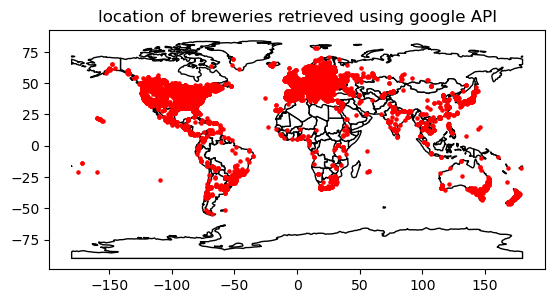

In [84]:
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')


gdf.plot(ax=ax, marker='o', color='red', markersize=5)

plt.title("location of breweries retrieved using google API")
plt.show();

In [89]:
# Extract a shapefile with switzerland boundaries of cantons
fname = "Switzerland_Canton.geojson"

df = gpd.read_file(fname)

df.head(1)

,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,OBJEKTART,REVISION_Q,ICC,KANTONSNUM,SEE_FLAECH,KANTONSFLA,KT_TEIL,NAME,EINWOHNERZ,geometry
0,{0B2364ED-49E0-4D53-A33C-C684DD530B57},2018-11-22,2012-10-26,2012,10,2022,5,Verbessert,AV,2019,...,Kanton,2021_Aufbau,CH,18,NaN,710530.0,0,Graubünden,200096.0,MULTIPOLYGON Z (((2735215.665 1194955.161 2870...


In [95]:
gdf_swi=gdf[gdf['location'] == "Switzerland"]
gdf_swi.head(1)

,Unnamed: 0,brewery_id,location,name,nbr_beers,longitude,lattitude,geometry
6060,6060,25352,Switzerland,4655 Brewing Company,6,47.387653,7.974527,POINT (7.97453 47.38765)


We can see on the map that some points where missclassified using the google API query: "name of brewery + brewery". Indeed, some points are outside of Switzerland. In the following, we will try a new query: "brewery + name of brewery + name of the Country"

In [ ]:
m = df.explore()

gdf_swi.explore(
     m=m, # pass the map object
     color="red", # use red color on all points
     column="nbr_beers",
     scheme="naturalbreaks",
     legend=True,
     k=3,
     legend_kwds=dict(colorbar=False), # do not use colorbar
     marker_kwds=dict(radius=2, fill=True), 
     tooltip="name", # show "name" column in the tooltip
     tooltip_kwds=dict(labels=False), # do not show column label in the tooltip
     name="cities" # name of the layer in the map
)

folium.TileLayer('Stamen Toner', control=True).add_to(m)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

m  # show map

The following excel file was done using the new Google API query.

In [111]:
df_brewery_swi = pd.read_csv("Switzerland_breweries.csv", encoding='utf-8' )

In [113]:
print(df_brewery_swi.shape)
df_brewery_swi = df_brewery_swi.dropna()
print(df_brewery_swi.shape)

(534, 7)
(523, 7)


In [114]:
gdf__brewery_swi = gpd.GeoDataFrame(
    df_brewery_swi, geometry=gpd.points_from_xy(df_brewery_swi.longitude, df_brewery_swi.latitude))

In [115]:
gdf__brewery_swi.head(1)

,Unnamed: 0,brewery_id,location,name,nbr_beers,latitude,longitude,geometry
0,6058,23198,Switzerland,1386,2,47.125632,8.194943,POINT (8.19494 47.12563)


## Better Google API query for Switzerland
Here, we can see that with that new query, we have only 1 missclassified brewery, which is much better.

In [ ]:
m = df.explore()

gdf__brewery_swi.explore(
     m=m, # pass the map object
     color="red", # use red color on all points
     column="nbr_beers",
     scheme="naturalbreaks",
     legend=True,
     k=3,
     legend_kwds=dict(colorbar=False), # do not use colorbar
     marker_kwds=dict(radius=2, fill=True), 
     tooltip="name", # show "name" column in the tooltip
     tooltip_kwds=dict(labels=False), # do not show column label in the tooltip
     name="cities" # name of the layer in the map
)

folium.TileLayer('Stamen Toner', control=True).add_to(m)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

m  # show map